# COMP9321 Assignment 3 
#### ZID 5278144  QIU XIN

## Data Exploration

In [60]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns

#### Feature Type

In [61]:
data = pd.read_csv("training.csv")
data.info()
bool_features = data[data[data.columns[data.apply(lambda x: len(x.unique())) == 2]].isin([0, 1, "Y", "N"])].dropna(axis=1).columns.values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108000 entries, 0 to 107999
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 100.5+ MB


In [62]:
numerical_features = np.setdiff1d(data.select_dtypes(include=["int64", "float64"]).columns.values, bool_features)

In [63]:
object_features = np.setdiff1d(data.columns.values, numerical_features)
object_features = np.setdiff1d(object_features, bool_features)

#### Plot Target

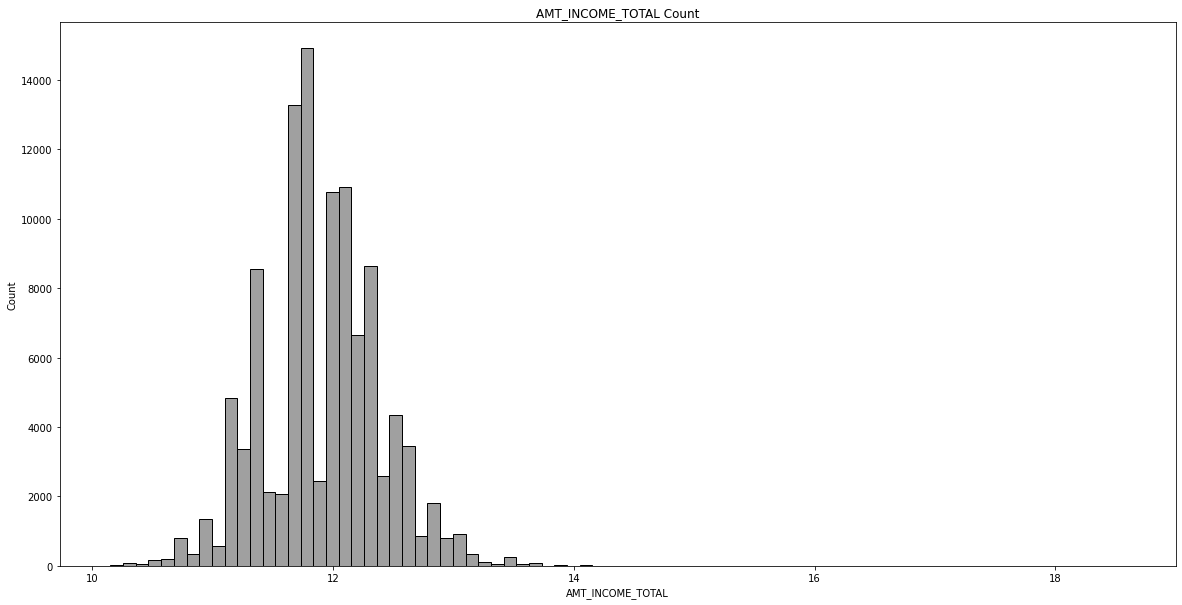

In [101]:
fig, ax = plt.subplots(figsize=(20,10))
# x = data.AMT_INCOME_TOTAL

ax = sns.histplot(np.log(data.AMT_INCOME_TOTAL), bins=80, color="grey")
ax.set_title("AMT_INCOME_TOTAL Count")

plt.show()

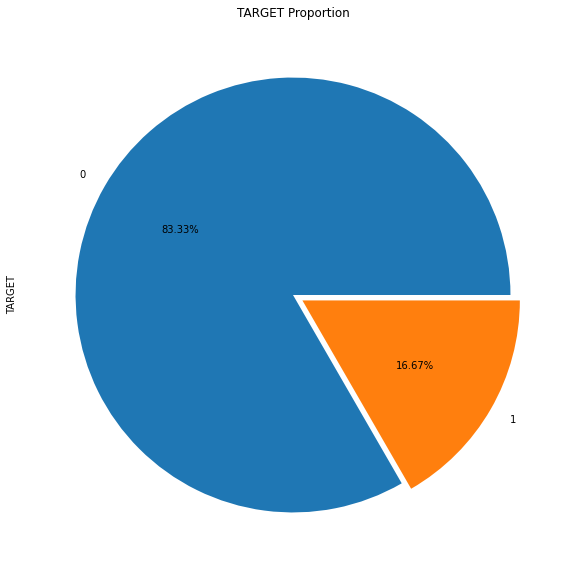

In [103]:
fig, ax = plt.subplots(figsize=(20,10))
ax = data.TARGET.value_counts().plot.pie(explode=[0,0.05],autopct="%1.2f%%")
ax.set_title("TARGET Proportion")

plt.show()

#### Plot Feature

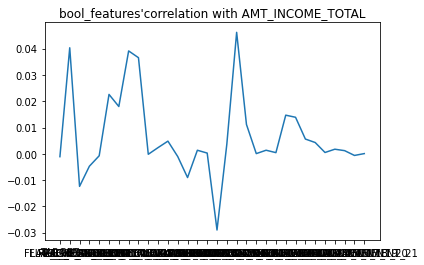

In [142]:
feas = bool_features.tolist()
feas.append('AMT_INCOME_TOTAL')

corr = data[feas].corr().loc['AMT_INCOME_TOTAL']
corr = corr.drop(index=['AMT_INCOME_TOTAL'])

plt.title("bool_features'correlation with AMT_INCOME_TOTAL")
plt.plot(corr)
plt.show()

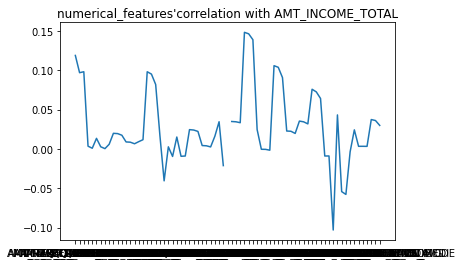

In [143]:
corr = data[numerical_features].corr().loc['AMT_INCOME_TOTAL']
corr = corr.drop(index=['AMT_INCOME_TOTAL'])

plt.title("numerical_features'correlation with AMT_INCOME_TOTAL")
plt.plot(corr)
plt.show()

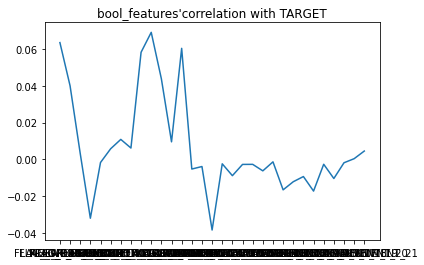

In [144]:
corr = data[bool_features].corr().loc['TARGET']
corr = corr.drop(index=['TARGET'])

plt.title("bool_features'correlation with TARGET")
plt.plot(corr)
plt.show()

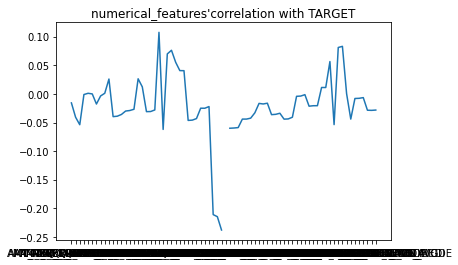

In [147]:
feas = numerical_features.tolist()
feas.append('TARGET')
corr = data[feas].corr().loc['TARGET']
corr = corr.drop(index=['TARGET'])

plt.title("numerical_features'correlation with TARGET")
plt.plot(corr)
plt.show()

### Data Pre-processing
After a careful inspection of the dataset, it is clear that the dataset has a certain number of missing values and there are features of string type in addition to numeric features. I performed the following data preprocessing steps
1. Removal of some features: remove the features with more than 50% missing values
2. Fill the missing values: Using SimpleImputer, I fill the "most_frequent" value in the column
3. Transforming the non-numeric features: use LabelEncoder
4. Separate training features from target features
5. Select the appropriate training features: for the first part "regression", I chose SelectFromModel, the judgment criterion is Lasso, the final number of selected features is 20; for the second part "classification", I chose SelectKBest, the feature_selection is f_classif, the final number of selected features is 20. The number of features selected is 13

In addition to the above basic operations, for the first part "regression", the dataset is also processed by removing outlier to reduce the influence of outliers; the dataset is also normalized by the features (StandardScaler). For the second part "classification", the features with only one value are removed



### Different models:
##### Part-I: Regression
| models | correlation | timer | 
| ------ | ------ | ------ |
| ridge✔ | 0.571 | 50.3s |
| LinearRegression | 0.572 | 50.4s |
| AdaBoostRegressor | 0.455 | 1m28.8s |
| GradientBoostingRegressor | 0.593 | 2m12.3s |

##### Part-II: Classification
| models | acc | timer |
| ------ | ------ | ------ |
|Perceptron|0.827|20.8s|
|RandomForestClassifier|0.834|3m20.2s|
|SVC|0.833|8m55.5s|
|LinearSVC|0.832|52.8s|
|KNeighborsClassifier|0.813|18.9s|
|GaussianNB|0.821|17.1s|
|SGDClassifier|0.829|28.2s|
|DecisionTreeClassifier|0.630|21.8s|
|RandomForestClassifier|0.828|49.4s|
|AdaBoostClassifier|0.831|23.5s|
|BaggingClassifier|0.770|30.1s|
|ExtraTreesClassifier✔|0.832|33.6s|
|GradientBoostingClassifier|0.750|51.3s|